## Завдання на практичну роботу

#### Виконав студент групи МІТ-31 _**Черевач Юрій**_

<div style='color:yellow; background-color:black;'>Для кожного завдання додатково використати різні моделі класифікації, налаштувати гіперпараметри, оцінити їхню ефективність та вивчити роботу з метриками якості та візуалізацією результатів.</div>

##### 1. Завдання для бінарної класифікації (Binary Classification):

- Використовуйте набір даних "classification_dataset.csv" для бінарної класифікації.
- Розділіть дані на навчальний та тестовий набори.
- Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і AUC-ROC.
- Візуалізуйте матрицю плутанини та навчіться розпізнавати типи помилок.

Найкращі гіперпараметри: {'C': 0.01, 'max_iter': 30}
Найкращий результат (середній): 0.85625
Точність в цілому: 0.775
Точність у визначенні цільової змінної: 0.7272727272727273
Відгук: 0.8421052631578947
F1 значення: 0.7804878048780488
ROC AUC: 0.8897243107769424
Матриця плутанини:
[[15  6]
 [ 3 16]]


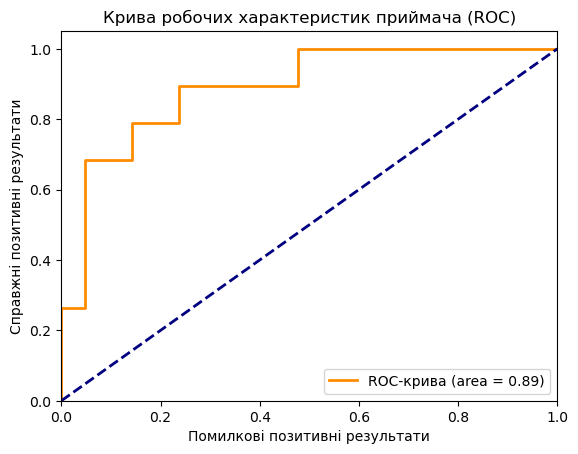

In [40]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

#зчитую датасет
data = pd.read_csv('classification_dataset.csv')

#розділяю дані на вхідні (X) на вихідні (y)
X = data.drop("Target", axis=1)
y = data["Target"]

#розділяю на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#визначення гіперпараметрів та їхніх значень
param_grid = {
    'C': [0.01, 0.1, 1, 4, 11, 15],  # Параметр регуляризації в логістичній регресії
    'max_iter': [30, 100, 250]  # Максимальна кількість ітерацій
}

#ініціалізація моделі
grid_search = GridSearchCV(LogisticRegression(), param_grid = param_grid)
grid_search.fit(X_train, y_train)

print("Найкращі гіперпараметри:", grid_search.best_params_)
print("Найкращий результат (середній):", grid_search.best_score_)

#використання моделі з оптимальними гіперпараметрами
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# оцінка ефективності
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Точність в цілому: {accuracy}')
print(f'Точність у визначенні цільової змінної: {precision}')
print(f'Відгук: {recall}')
print(f'F1 значення: {f1}')
print(f'ROC AUC: {roc_auc}')

# побудова матриці плутанини
confusion = confusion_matrix(y_test, y_pred)
print('Матриця плутанини:')
print(confusion)

# візуалізація ROC-кривої
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Помилкові позитивні результати')
plt.ylabel('Справжні позитивні результати')
plt.title('Крива робочих характеристик приймача (ROC)')
plt.legend(loc='lower right')
plt.show()

##### 2. Завдання для мультикласової класифікації (Multiclass Classification):

- Використовуйте набір даних "multiclass_dataset.csv" для мультикласової класифікації.
- Розділіть дані на навчальний та тестовий набори.
- Навчіть класифікатор (наприклад, Random Forest або нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук, F1-середнє і матриця плутанини.
- Порівняйте результати різних класифікаторів.

##### 3. Завдання для мультилейбл класифікації (Multilabel Classification):

- Використовуйте набір даних "multilabel_dataset.csv" для мультилейбл класифікації.
- Розділіть дані на навчальний та тестовий набори.
- Навчіть класифікатор для прогнозування мультилейблів (наприклад, використовуючи багатошарову нейронну мережу) та оцініть його ефективність за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.
- Вивчайте, як класифікатори працюють з різними комбінаціями мультилейбів.